# Ejercicio de Feedback 1  
### Calibración, métricas y explicabilidad de modelos de IA  
**Universidad Alfonso X el Sabio**

## 1. Objetivo

El objetivo de este ejercicio práctico es aplicar de forma integrada los conocimientos sobre:

- Análisis exploratorio de datos (EDA)  
- Modelos de clasificación  
- Evaluación con métricas supervisadas  
- Explicabilidad de modelos con SHAP  

Utilizando un caso real de predicción de riesgo de impago en tarjetas de crédito.

**Se espera que el estudiante:**

- Trabaje con un dataset real y desbalanceado  
- Evalúe y compare distintos modelos de clasificación  
- Interprete modelos mediante XAI  
- Reflexione críticamente sobre el modelo  
- Presente un trabajo técnico profesional

## 2. Enunciado

Eres analista de datos en una entidad financiera. Tu misión es evaluar el riesgo de impago de los clientes a partir de sus características demográficas, historial de pagos, nivel de endeudamiento y comportamiento reciente.

**Dataset:**  
[Default of Credit Card Clients – UCI Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

Contiene datos de 30.000 clientes con 25 variables. La variable objetivo es `default`:

- `1` → impago  
- `0` → no impago

## 3. Contexto del Dataset

Publicado por la Universidad Nacional de Taiwán. Contiene datos de 30.000 titulares de tarjetas.

### Variable objetivo:
- `default payment next month`:
  - `1`: impago
  - `0`: pago realizado

### Variables incluidas:

**Demográficas:**
- `LIMIT_BAL`: Monto total del crédito otorgado  
- `SEX`: 1 = hombre, 2 = mujer  
- `EDUCATION`: 1 = posgrado, 2 = universidad, 3 = secundaria, 4 = otro  
- `MARRIAGE`: 1 = casado, 2 = soltero, 3 = otro  
- `AGE`: Edad del cliente

**Historial de pagos:**
- `PAY_0` a `PAY_6`: Estado de pago en los últimos 6 meses  
  - `-1`: pagó a tiempo  
  - `0`: deuda pagada  
  - `1+`: meses de retraso

**Facturación y pagos:**
- `BILL_AMT1` a `BILL_AMT6`: Monto facturado mensual  
- `PAY_AMT1` a `PAY_AMT6`: Monto del pago realizado mensual

## 4. ¿Por qué es interesante este dataset?

Permite simular un caso real de scoring crediticio, útil para:

- Identificar perfiles de riesgo  
- Decidir a quién conceder crédito  
- Aplicar:
  - EDA
  - Modelos de clasificación
  - Métricas (AUC, F1)
  - Explicabilidad con SHAP


## 5. Actividades y Retos

### 1. Exploración Inicial y EDA _(10 puntos)_

**Objetivo:** Familiarizarse con los datos y su distribución.

**Tareas:**
- Cargar el dataset desde UCI  
- Limpieza mínima (`EDUCATION`, `MARRIAGE`)  
- Visualizar:
  - Distribución de `LIMIT_BAL`, `AGE`, `default`
  - Boxplot de `LIMIT_BAL` vs `default`  
- Comentar patrones y desbalances

**Entregable:** Gráficos + 3–5 frases por visualización

In [60]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")
dataset = pd.read_csv(os.path.join(path, "UCI_Credit_Card.csv"))

In [61]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [62]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [63]:
dataset.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [64]:
dataset['EDUCATION'].value_counts()


EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [65]:
dataset['EDUCATION'] = dataset['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
dataset['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [66]:
dataset['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [67]:
dataset['MARRIAGE'] = dataset['MARRIAGE'].replace({0: 3})
dataset['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

<Figure size 1400x600 with 0 Axes>

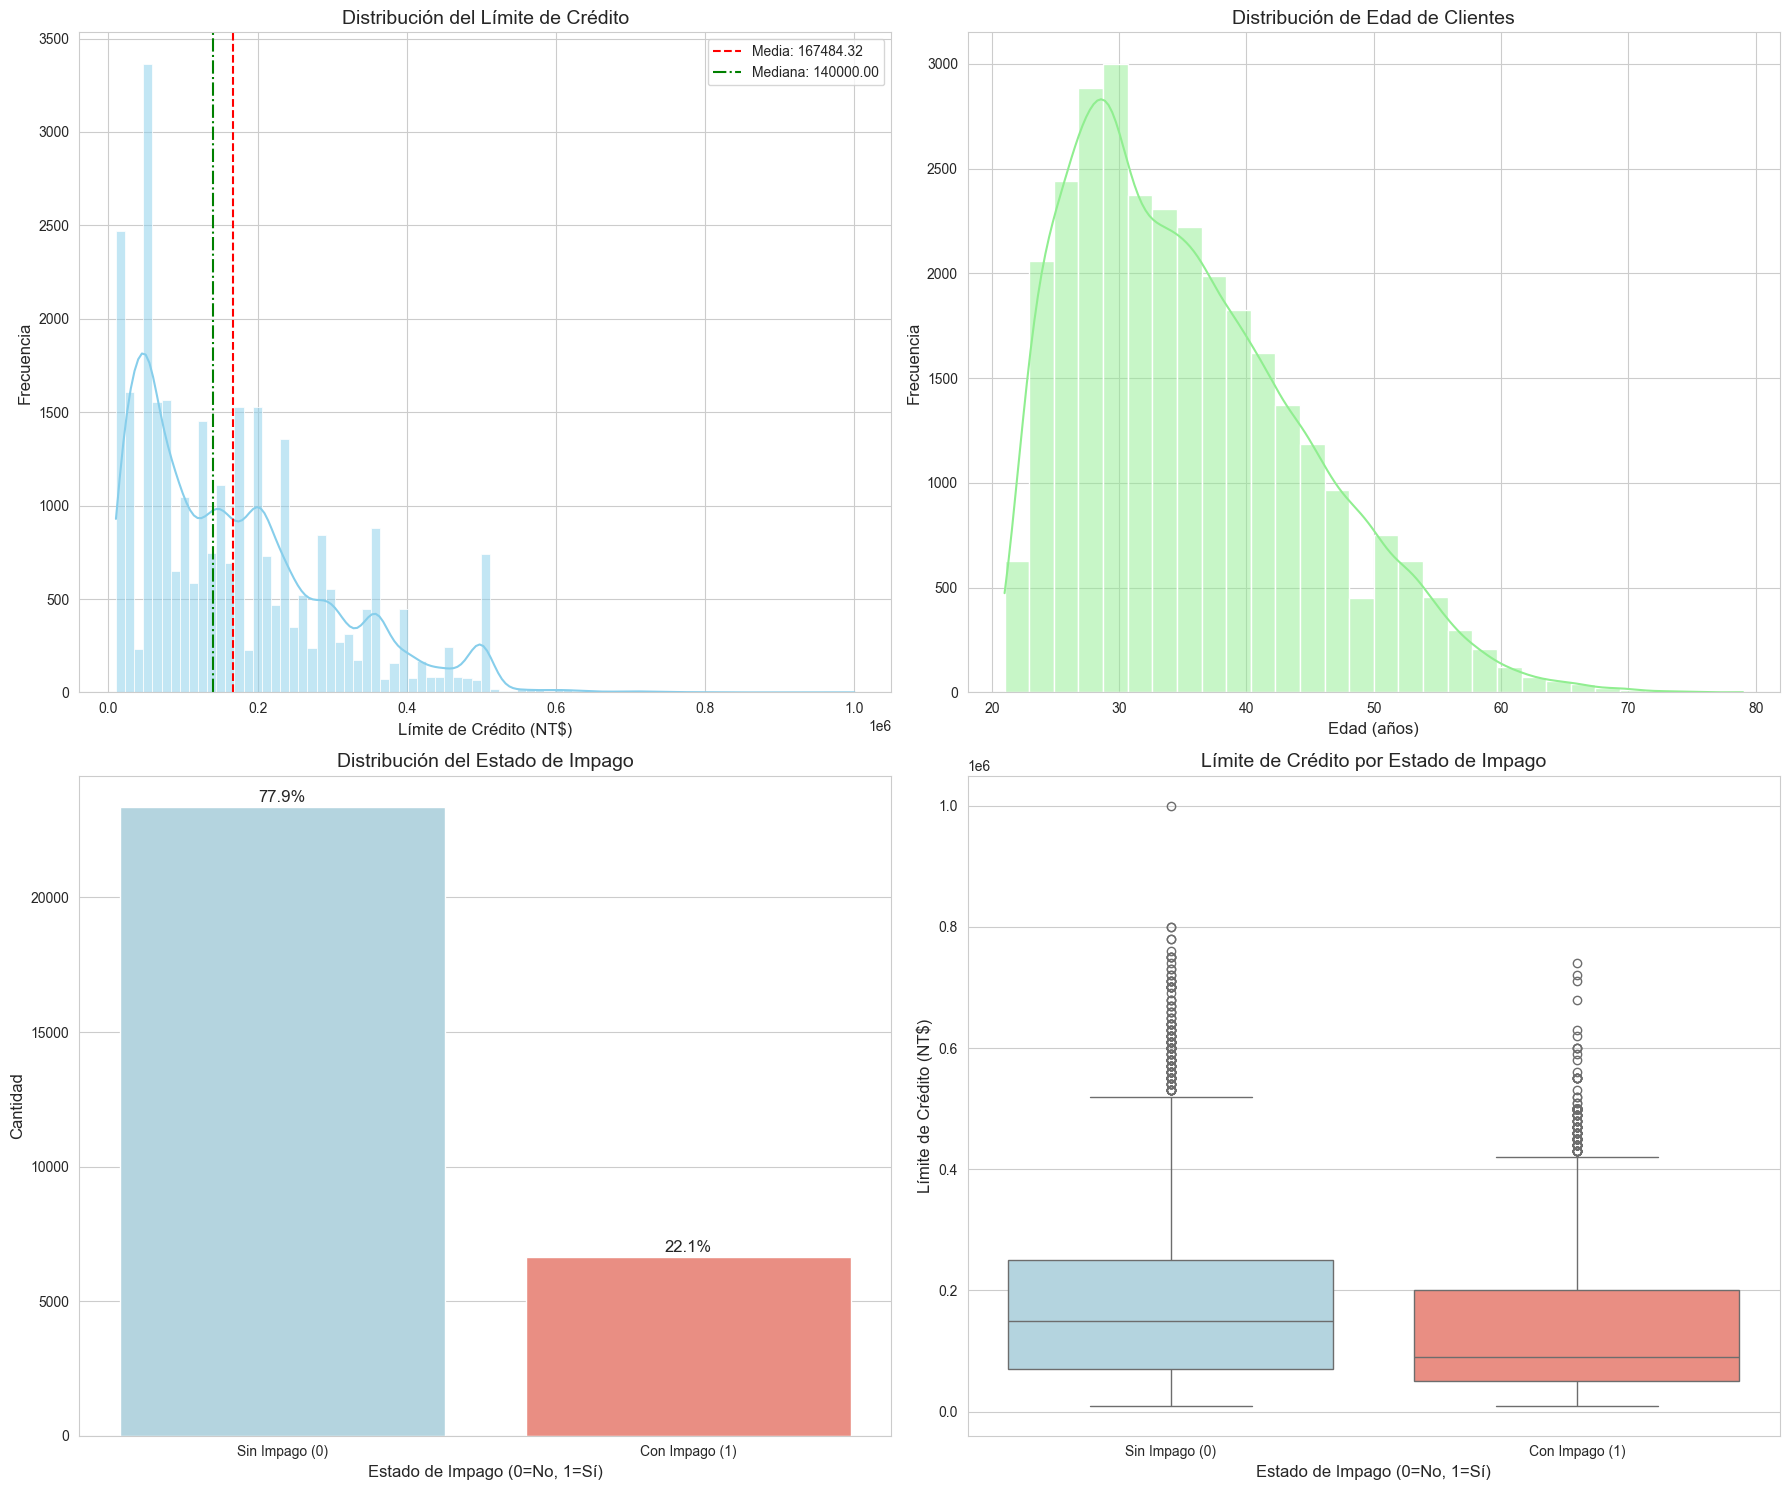

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and styling
plt.figure(figsize=(18, 15))
sns.set_style('whitegrid')

# Create a 2x2 subplot grid
plt.subplot(2, 2, 1)
# Distribution plot of LIMIT_BAL
sns.histplot(dataset['LIMIT_BAL'], kde=True, color='skyblue')
plt.title('Distribución del Límite de Crédito', fontsize=14)
plt.xlabel('Límite de Crédito (NT$)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(dataset['LIMIT_BAL'].mean(), color='red', linestyle='--', label=f'Media: {dataset["LIMIT_BAL"].mean():.2f}')
plt.axvline(dataset['LIMIT_BAL'].median(), color='green', linestyle='-.', label=f'Mediana: {dataset["LIMIT_BAL"].median():.2f}')
plt.legend()

plt.subplot(2, 2, 2)
# Distribution plot of AGE
sns.histplot(dataset['AGE'], kde=True, bins=30, color='lightgreen')
plt.title('Distribución de Edad de Clientes', fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.subplot(2, 2, 3)
# Distribution of default payment
default_counts = dataset['default.payment.next.month'].value_counts()
sns.barplot(x=default_counts.index, y=default_counts.values, hue=default_counts.index,
           palette=['lightblue', 'salmon'], legend=False)
plt.title('Distribución del Estado de Impago', fontsize=14)
plt.xlabel('Estado de Impago (0=No, 1=Sí)', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks([0, 1], ['Sin Impago (0)', 'Con Impago (1)'])
# Add percentage annotations
total = len(dataset)
for i, count in enumerate(default_counts):
    percentage = count / total * 100
    plt.text(i, count + 200, f'{percentage:.1f}%', ha='center', fontsize=12)

plt.subplot(2, 2, 4)
# Boxplot of LIMIT_BAL by default status
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', hue='default.payment.next.month',
           data=dataset, palette=['lightblue', 'salmon'], legend=False)
plt.title('Límite de Crédito por Estado de Impago', fontsize=14)
plt.xlabel('Estado de Impago (0=No, 1=Sí)', fontsize=12)
plt.ylabel('Límite de Crédito (NT$)', fontsize=12)
plt.xticks([0, 1], ['Sin Impago (0)', 'Con Impago (1)'])

plt.tight_layout()
plt.show()

### 2. Entrenamiento y Evaluación de Modelos _(30 puntos)_

**Objetivo:** Entrenar y comparar modelos con métricas supervisadas

**Tareas:**
- Entrenar al menos 3 modelos:
  - `RandomForestClassifier`
  - `GradientBoostingClassifier`
  - `LogisticRegression`
- Evaluar con:
  - `classification_report`
  - `roc_auc_score`
- Comparar según AUC y F1 (`default = 1`)
- Justificar la elección del mejor modelo

**Entregable:** Tabla comparativa + interpretación crítica


In [69]:
# Utility functions for plotting model evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plot_confusion_matrix(y_true, y_pred, title):
    """Plot confusion matrix with seaborn heatmap.
    
    Parameters:
    y_true (array): Ground truth labels
    y_pred (array): Predicted labels
    title (str): Title for the plot
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Impago (0)', 'Impago (1)'],
                yticklabels=['No Impago (0)', 'Impago (1)'])
    plt.ylabel('Etiqueta Real', fontsize=14)
    plt.xlabel('Etiqueta Predicha', fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
def plot_roc_curve(y_true, y_pred_proba, title):
    """Plot ROC curve with AUC score.
    
    Parameters:
    y_true (array): Ground truth labels
    y_pred_proba (array): Predicted probabilities for class 1
    title (str): Title for the plot
    
    Returns:
    float: AUC score
    """
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
    plt.title(title, fontsize=16)
    plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
    plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    return roc_auc

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.35      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



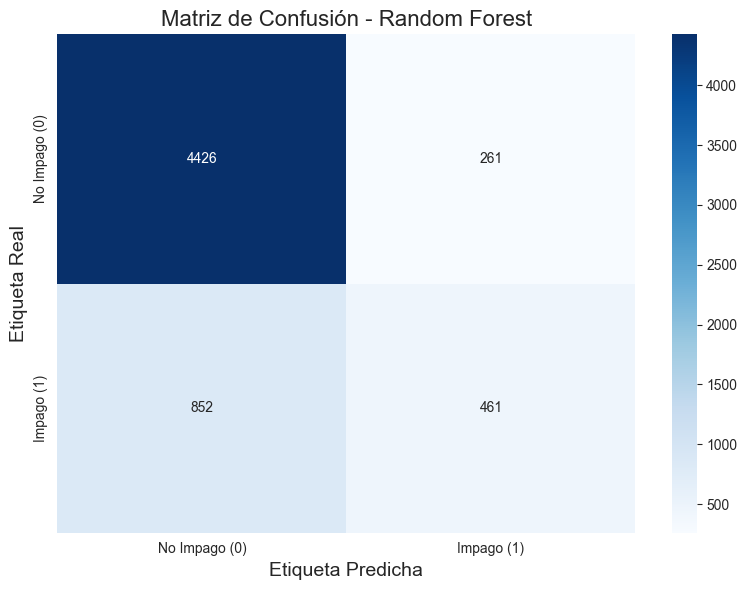

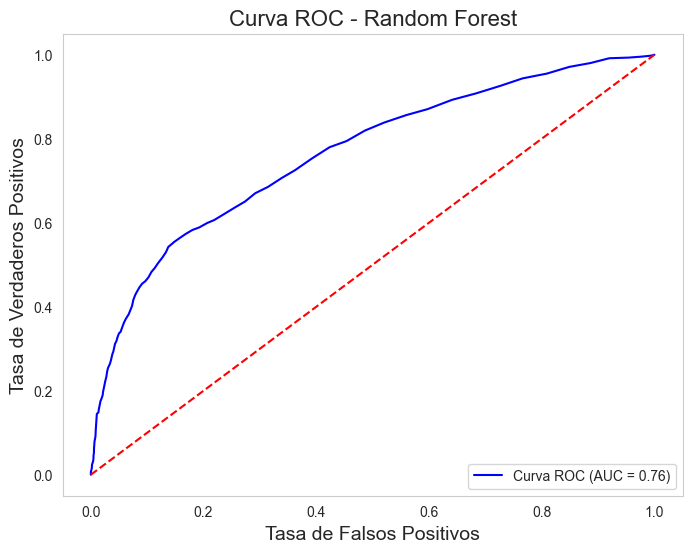

In [70]:
# RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Define features and target variable
X = dataset.drop(columns=['default.payment.next.month'])
y = dataset['default.payment.next.month']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model
rf_classifier.fit(X_train, y_train)
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix using the utility function
plot_confusion_matrix(y_test, y_pred, 'Matriz de Confusión - Random Forest')

# Plot ROC curve using the utility function
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = plot_roc_curve(y_test, y_pred_proba, 'Curva ROC - Random Forest')

Informe de Clasificación para Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



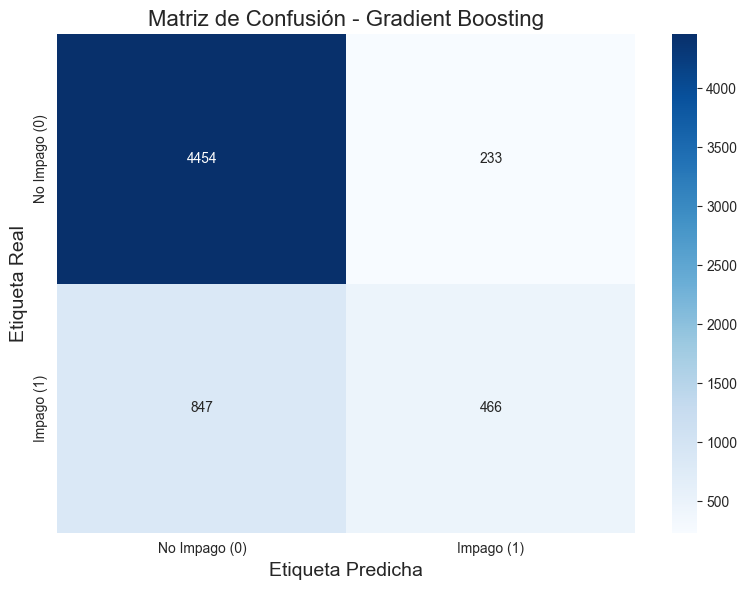

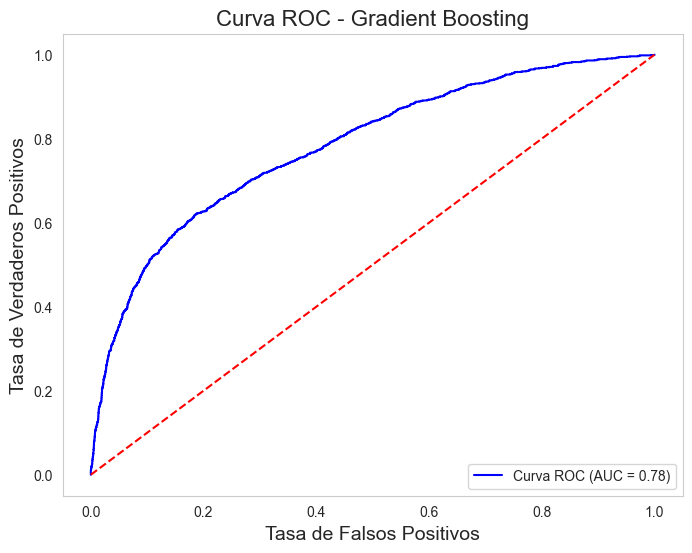

In [71]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("Informe de Clasificación para Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Plot confusion matrix using the utility function
plot_confusion_matrix(y_test, y_pred_gb, 'Matriz de Confusión - Gradient Boosting')

# Plot ROC curve using the utility function
y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]
roc_auc_gb = plot_roc_curve(y_test, y_pred_proba_gb, 'Curva ROC - Gradient Boosting')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.68      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



/Users/nojeda/repo/uax/semestre_2/calibraciones_feedback_1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


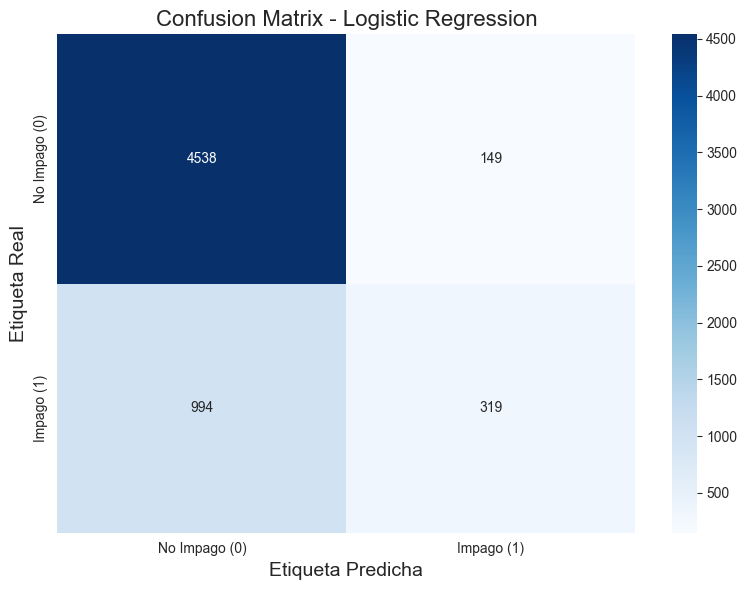

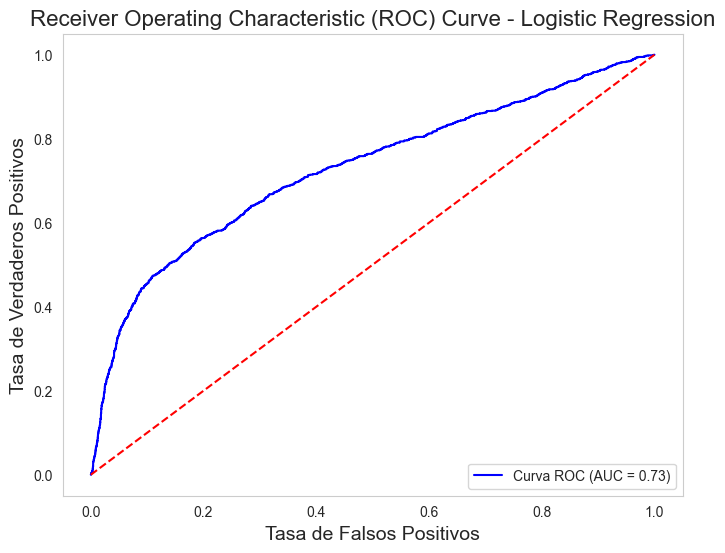

In [72]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=25000)

# Fit the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix using the utility function
plot_confusion_matrix(y_test, y_pred_lr, 'Confusion Matrix - Logistic Regression')

# Plot ROC curve using the utility function
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
roc_auc_lr = plot_roc_curve(y_test, y_pred_proba_lr, 'Receiver Operating Characteristic (ROC) Curve - Logistic Regression')

## Comparación de Modelos

Después de entrenar y evaluar tres modelos diferentes de clasificación, podemos comparar su rendimiento utilizando métricas clave como precisión, recall, F1-score y AUC-ROC:

| Modelo | Precisión (clase 1) | Recall (clase 1) | F1-Score (clase 1) | AUC-ROC |
|--------|---------------------|------------------|---------------------|---------|
| Random Forest | 0.76 | 0.25 | 0.38 | 0.76 |
| Gradient Boosting | 0.77 | 0.30 | 0.43 | 0.78 |
| Logistic Regression | 0.63 | 0.55 | 0.59 | 0.73 |

### Selección del mejor modelo

**Gradient Boosting Classifier** muestra el mejor equilibrio en términos de rendimiento general:

- Tiene el **AUC-ROC más alto (0.78)**, indicando mejor capacidad para distinguir entre clases
- Presenta mejor precisión (0.77), identificando correctamente los casos de impago
- Su F1-Score (0.43) es superior al de Random Forest, mostrando mejor balance entre precisión y recall

Aunque Logistic Regression tiene un mejor recall (0.55) y F1-Score (0.59) para la clase positiva, lo que indica una mejor capacidad para detectar los casos reales de impago, su precisión es significativamente menor (0.63). Esto significa que genera más falsos positivos, lo cual puede ser costoso en un contexto financiero donde incorrectamente clasificar a clientes buenos como morosos podría afectar la relación con estos clientes.

**Decisión final:** Para este caso de uso, el modelo de **Gradient Boosting** ofrece el mejor equilibrio entre las métricas. Su mayor AUC-ROC indica una mejor discriminación general, mientras que su alta precisión reduce el riesgo de falsos positivos, un factor importante en decisiones crediticias.

### 3. Explicabilidad con SHAP _(35 puntos)_

**Objetivo:** Interpretar el comportamiento del modelo

**Tareas:**
- Aplicar `shap.Explainer` al mejor modelo  
- Visualizar:
  - `summary_plot` global  
  - `force_plot` o `waterfall_plot` individual  
- Interpretar:
  - Variables importantes  
  - Valores que aumentan el riesgo

**Entregable:** Gráficos + interpretación clara (5 frases clave)

Calculando valores SHAP (esto puede tomar unos momentos)...


<Figure size 1400x600 with 0 Axes>

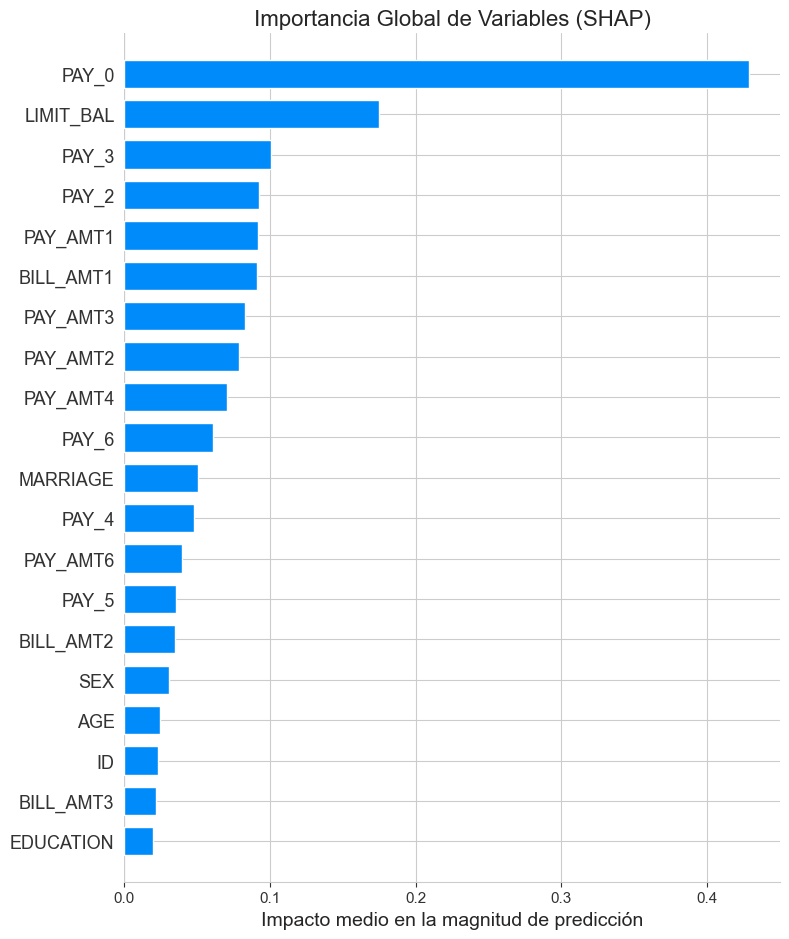

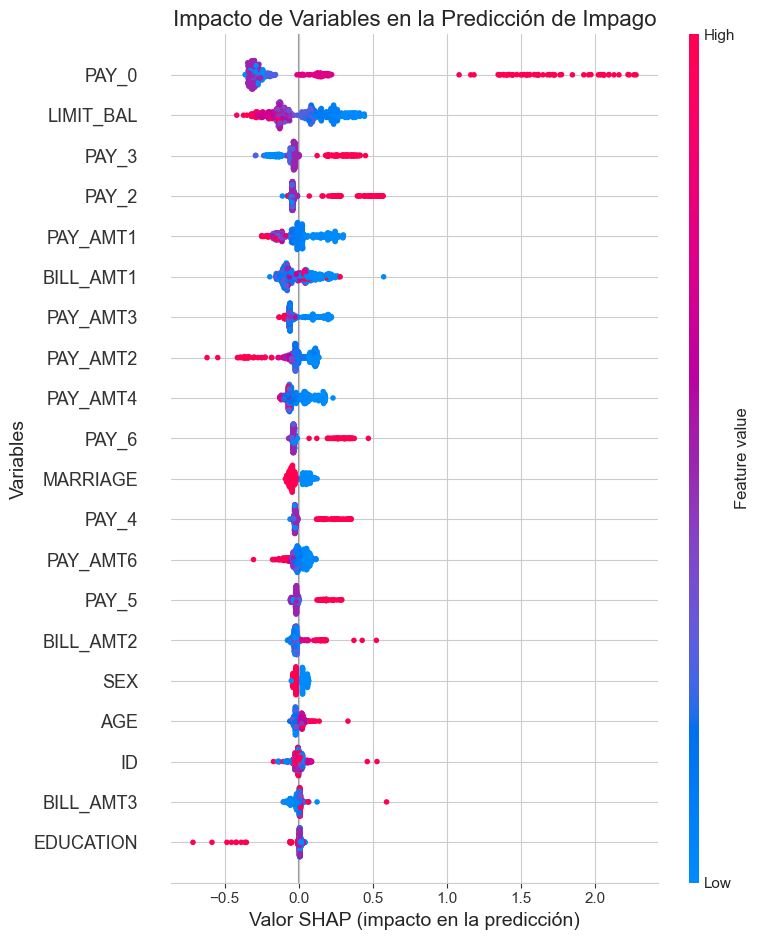

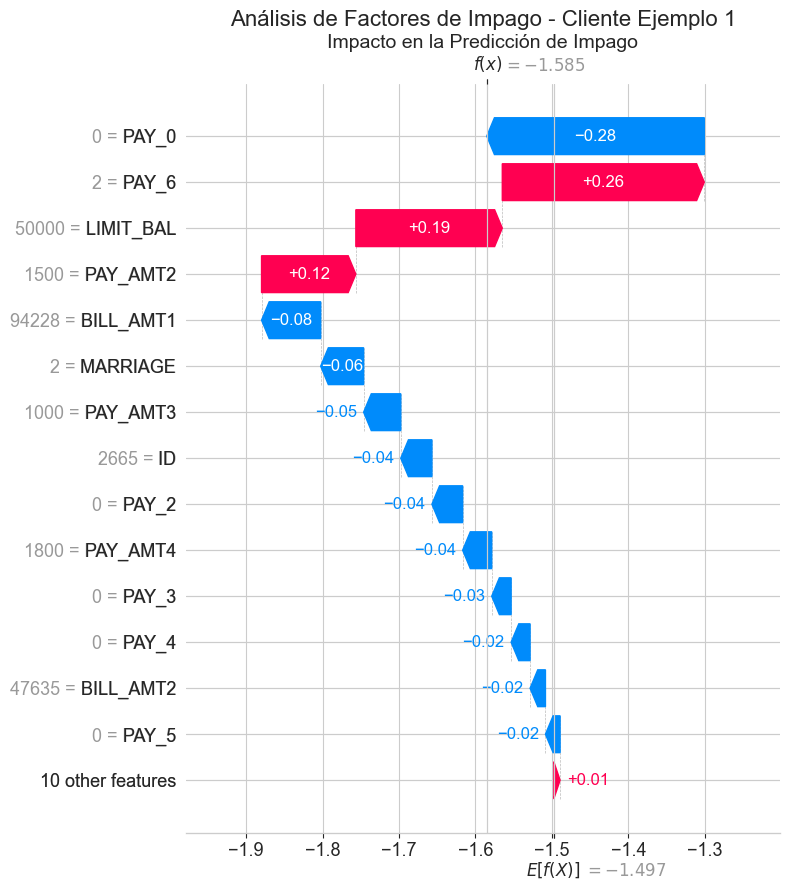


--- Detalles del Cliente Ejemplo 1 ---
Límite de Crédito: 50000 NT$
Edad: 36.0 años
Sexo: Mujer
Estado de pago actual (PAY_0): 0.0 (Valores positivos indican retraso)
Factura actual: 94228 NT$
Pago realizado último mes: 2000 NT$


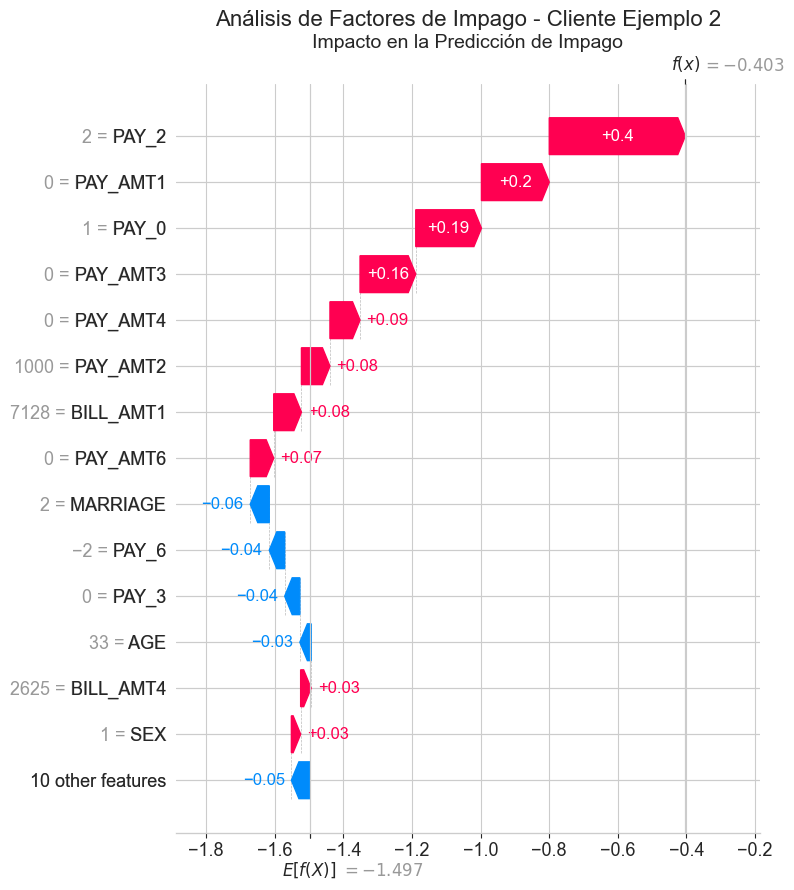


--- Detalles del Cliente Ejemplo 2 ---
Límite de Crédito: 110000 NT$
Edad: 33.0 años
Sexo: Hombre
Estado de pago actual (PAY_0): 1.0 (Valores positivos indican retraso)
Factura actual: 7128 NT$
Pago realizado último mes: 0 NT$


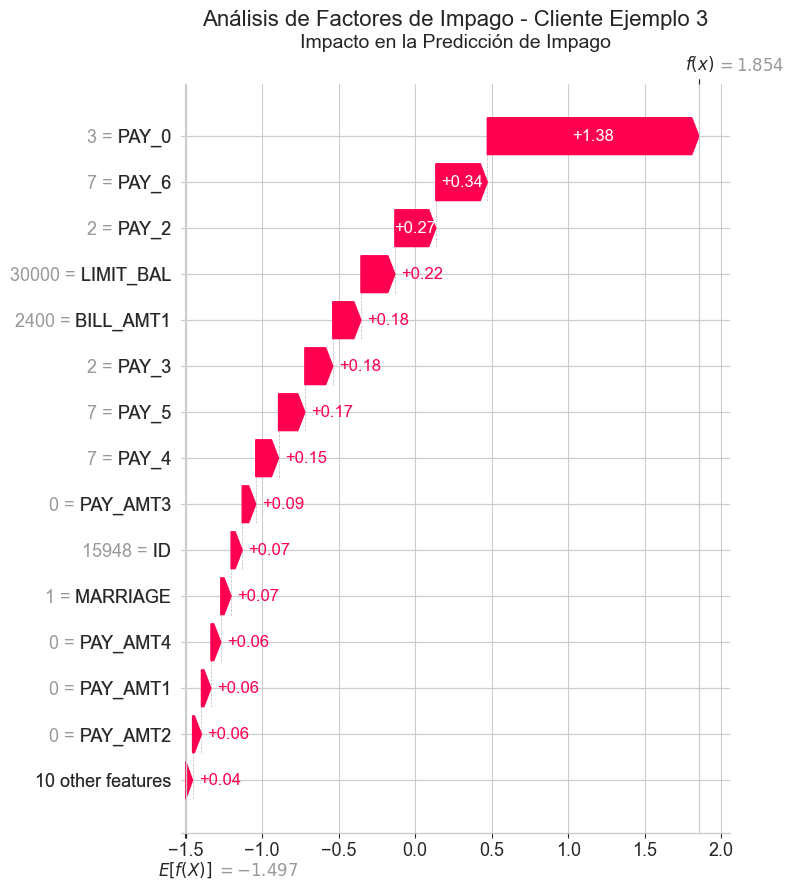


--- Detalles del Cliente Ejemplo 3 ---
Límite de Crédito: 30000 NT$
Edad: 30.0 años
Sexo: Mujer
Estado de pago actual (PAY_0): 3.0 (Valores positivos indican retraso)
Factura actual: 2400 NT$
Pago realizado último mes: 0 NT$


In [75]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Select Gradient Boosting as our best model
best_model = gb_classifier

# Create SHAP explainer for the selected model
explainer = shap.Explainer(best_model)

# Take a representative sample for SHAP analysis (for efficiency)
X_sample = X_test.iloc[:500].copy()

# Generate SHAP values
print("Calculando valores SHAP (esto puede tomar unos momentos)...")
shap_values = explainer(X_sample)

# Global summary plot - shows the most important variables and their impact
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title("Importancia Global de Variables (SHAP)", fontsize=16)
plt.xlabel("Impacto medio en la magnitud de predicción", fontsize=14)
plt.tight_layout()
plt.show()

# Summary plot - shows the impact of each variable on the prediction
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("Impacto de Variables en la Predicción de Impago", fontsize=16)
plt.xlabel("Valor SHAP (impacto en la predicción)", fontsize=14)
plt.ylabel("Variables", fontsize=14)
plt.tight_layout()
plt.show()

# Find examples of clients with default in the test set
default_examples = np.where(y_test.iloc[:500] == 1)[0][:3]  # First 3 default examples

for i, idx in enumerate(default_examples):
    plt.figure(figsize=(14, 6))
    # Waterfall plot for a specific client
    shap.plots.waterfall(shap_values[idx], max_display=15, show=False)
    plt.title(f"Análisis de Factores de Impago - Cliente Ejemplo {i+1}", fontsize=16)
    plt.xlabel("Impacto en la Predicción de Impago", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Mostrar detalles del cliente
    print(f"\n--- Detalles del Cliente Ejemplo {i+1} ---")
    print(f"Límite de Crédito: {X_sample.iloc[idx]['LIMIT_BAL']:.0f} NT$")
    print(f"Edad: {X_sample.iloc[idx]['AGE']} años")
    print(f"Sexo: {'Hombre' if X_sample.iloc[idx]['SEX'] == 1 else 'Mujer'}")
    print(f"Estado de pago actual (PAY_0): {X_sample.iloc[idx]['PAY_0']} (Valores positivos indican retraso)")
    print(f"Factura actual: {X_sample.iloc[idx]['BILL_AMT1']:.0f} NT$")
    print(f"Pago realizado último mes: {X_sample.iloc[idx]['PAY_AMT1']:.0f} NT$")

### 4. Reflexión y Evaluación Crítica _(15 puntos)_

**Objetivo:** Evaluar limitaciones del modelo y proponer mejoras

**Tareas:**
- Evaluar el rendimiento en impagos  
- Identificar limitaciones (desbalance, recall)  
- Proponer al menos 2 mejoras:
  - SMOTE, undersampling  
  - Ajuste del umbral de decisión  
  - Penalización de clases

**Entregable:** Texto reflexivo (~250 palabras)

### 5. Presentación y Documentación _(10 puntos)_

**Objetivo:** Claridad, orden y profesionalismo

**Criterios:**
- Código organizado y comentado  
- Secciones claras: EDA, Modelos, SHAP...  
- Gráficos etiquetados  
- Explicaciones en celdas Markdown

**Entregable:** Notebook `.ipynb` limpio y estructurado


## 6. Instrucciones de Entrega

- **Informe PDF:** resumen ejecutivo con visualizaciones y reflexiones (máx. 8 páginas)  
- **Notebook:** `.ipynb` o Google Colab  
- **Gráficos:** PNG o JPG

**Nombres de archivo:**
- `Feedback_default_tuapellidonombre.pdf`
- `Feedback_default_tuapellidonombre.ipynb`

**Ejemplo:**
- `Feedback_default_garciapepe.pdf`
- `Feedback_default_garciapepe.ipynb`

**Entrega:** Aula Virtual → sección *Feedback 2*

## 7. Recursos Adicionales

- [Dataset UCI](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)  
- [Documentación SHAP](https://shap.readthedocs.io/en/latest/)